In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter

In [2]:
with h5py.File("data.h5", 'r') as hf:
    data = hf["data"][:]
    amplitudes = hf["amplitudes"][:]

In [3]:
amplitudes

array([0.215625, 0.035938, 0.14375 , 0.43125 , 0.      , 0.2875  ,
       0.646875, 0.898438, 0.107812, 1.653125, 0.      , 0.179688,
       0.251563, 0.071875, 0.071875, 0.107812, 0.467188, 0.      ,
       2.479688, 0.      , 0.107812, 0.071875, 1.329688, 0.610938,
       0.107812, 0.14375 , 0.179688, 9.164062, 0.      , 0.      ,
       0.179688, 0.14375 , 0.107812, 0.107812, 1.114063, 0.682813,
       0.215625, 1.473438, 0.071875, 0.2875  , 1.185938, 0.      ,
       0.179688, 0.251563, 0.179688, 0.323438, 0.107812, 1.221875,
       0.826563, 0.071875, 0.107812, 0.      , 0.14375 , 0.934375,
       0.754688, 1.221875, 0.323438, 0.      ])

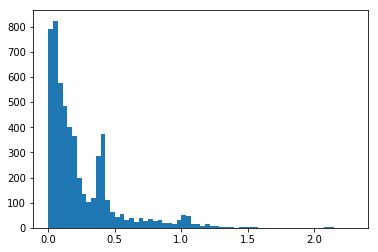

In [110]:
#bins = np.linspace(0, 9.165, 2**8+1)
bins = np.linspace(0, 9.165/4, 2**6+1)
plt.hist(amplitudes, bins)
plt.show()

In [52]:
def pulse_function(x, a, x0, sigma, t):
    return  np.exp(-t/x)*a*np.exp(-(x-x0)**2/(2*sigma**2))

In [53]:
pedestal = -4.6
epsilon = 0.001

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


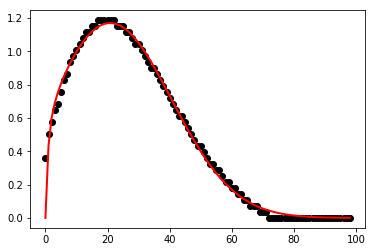

In [64]:
y = data[20]
y = y - pedestal
t = np.arange(len(y))
p0 = [0.2, 15., 15., 0.5]
popt, pcov = curve_fit(pulse_function, t, y, p0=p0)
plt.plot(t, y, "o", color="k")
plt.plot(t, pulse_function(t, *popt), color="r", linewidth=2)
plt.show()

In [73]:
max_samples = np.max(data, axis=1)

In [74]:
max_samples.shape

(5471,)

In [77]:
max_samples = np.repeat(max_samples, 99).reshape((-1,99))

In [81]:
samples_at_maximum = np.sum(data == max_samples, axis=1)

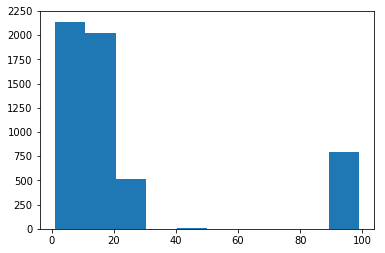

In [82]:
plt.hist(samples_at_maximum)
plt.show()

In [83]:
m = samples_at_maximum < 60
data = data[m]
amplitudes = amplitudes[m]
samples_at_maximum = samples_at_maximum[m]

In [104]:
correction = 9.16/2**8 * (samples_at_maximum - 1)/10.

In [105]:
correction

array([0.02504688, 0.00715625, 0.03578125, ..., 0.02504688, 0.0715625 ,
       0.06440625])

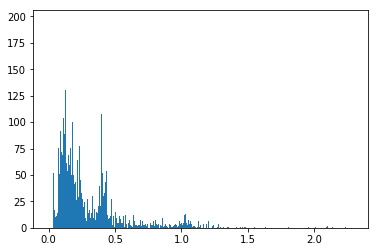

In [106]:
#bins = np.linspace(0, 9.165, 2**8+1)
bins = np.linspace(0, 9.165/4, 2**9+1)
plt.hist(amplitudes + correction, bins)
plt.show()